# <Span style="color:#134f5c"> TRIDENT1 - Slicer - Kwiecień 2020 ['kliki_uczenie']

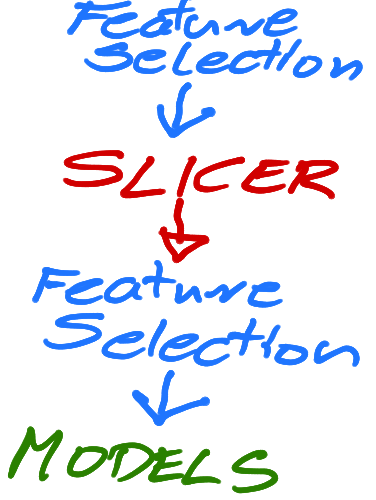

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/4/kliki_uczenie.csv', sep=';')
print(df.shape)
print()
print(df.columns)
df.head(3)

(3619621, 24)

Index(['id', 'klik', 'data_godzina', 'baner_pozycja', 'strona_id',
       'strona_domena', 'strona_kategoria', 'aplikacja_id', 'aplikacja_domena',
       'aplikacja_kategoria', 'urz_id', 'urz_ip', 'urz_model', 'urz_typ',
       'urz_polaczenie', 'kat1', 'kat2', 'kat3', 'kat4', 'kat5', 'kat6',
       'kat7', 'kat8', 'kat9'],
      dtype='object')


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,urz_polaczenie,kat1,kat2,kat3,kat4,kat5,kat6,kat7,kat8,kat9
0,93718246913880603,0,17030100,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,0,105,119743,10320,10050,12264,13,10427,100000,61
1,93718246913880604,0,17030100,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,105,115706,10320,10050,11722,10,10035,-1,79
2,93718246913880605,0,17030100,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,07d7df22,...,0,105,120352,10320,10050,12333,10,10039,-1,157


### <span style="color:green"> Kasuje bezsensowne kolumny

In [2]:
# del df['Unnamed: 0']
# del df['Unnamed: 0.1']

### <span style="color:green"> Wielkość bazy df jest ogromna - wyciągam tylko 33% losowo wybranych rekordów</span> 
Taka metoda jest najbardziej reprezentatywna i oszczędza zasoby komputera.

In [3]:
df2 = df.sample(frac = 0.33, random_state=10)
df2.shape

(1194475, 24)

## <span style="color:green"> Wyświetlenie braków </span>  (własnej roboty)

In [4]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df2.columns[i]
    r = df2[i].isnull().sum()
    h = df2[i].count()
    pr = (r/h)*100
   
    if r > 0:
        print(i,"--------",r,"--------",h,"--------",pr) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------


## <span style="color:green"> Nie warto kasować rekordów z brakami tylko warto wstawiać tam wartości z poza zakresu </span>

Wyszukuje tylko puste rekordy

In [5]:
null_value_stats = df2.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

Wstawia w puste miejsca wartości z poza zakresu

In [6]:
df2.shape

(1194475, 24)

In [7]:
df2.fillna(7777, inplace=True)

## <span style="color:green"> Przegląd danych pod kontem formatu i ilości wartości unikalnych</span>  (własnej roboty)

In [8]:
a,b = df2.shape     #<- ile mamy kolumn
b

import numpy as np

for i in range(1,b):
    i = df2.columns[i]
    h = df2[i].nunique()
    f = df2[i].dtypes
          
    print(f,'---nunique->',h,'---name->', i)

int64 ---nunique-> 2 ---name-> klik
int64 ---nunique-> 216 ---name-> data_godzina
int64 ---nunique-> 7 ---name-> baner_pozycja
object ---nunique-> 2740 ---name-> strona_id
object ---nunique-> 3053 ---name-> strona_domena
object ---nunique-> 21 ---name-> strona_kategoria
object ---nunique-> 3356 ---name-> aplikacja_id
object ---nunique-> 198 ---name-> aplikacja_domena
object ---nunique-> 26 ---name-> aplikacja_kategoria
object ---nunique-> 178374 ---name-> urz_id
object ---nunique-> 630060 ---name-> urz_ip
object ---nunique-> 5348 ---name-> urz_model
int64 ---nunique-> 4 ---name-> urz_typ
int64 ---nunique-> 4 ---name-> urz_polaczenie
int64 ---nunique-> 7 ---name-> kat1
int64 ---nunique-> 2149 ---name-> kat2
int64 ---nunique-> 8 ---name-> kat3
int64 ---nunique-> 9 ---name-> kat4
int64 ---nunique-> 397 ---name-> kat5
int64 ---nunique-> 4 ---name-> kat6
int64 ---nunique-> 65 ---name-> kat7
int64 ---nunique-> 165 ---name-> kat8
int64 ---nunique-> 55 ---name-> kat9


## <span style="color:green"> Które z tych funkcji są kategoryczne?</span> (własnej roboty)

Stawiam dwa warunki: 

1. funkcja jest kategoryczna bo ma format 'object'
2. funkcja jest kategoryczna bo ma do 10 unikalnych wartości

In [9]:
a,b = df2.shape     #<- ile mamy kolumn
b

print('ONLY DISCRETE FUNCTION')
print('----------------------')
for i in range(1,b):
    i = df2.columns[i]
    f = df2[i].dtypes
    h = df2[i].nunique()
    
    if f == np.object or h<=10:
        print(i,"---",f,"---",h)

ONLY DISCRETE FUNCTION
----------------------
klik --- int64 --- 2
baner_pozycja --- int64 --- 7
strona_id --- object --- 2740
strona_domena --- object --- 3053
strona_kategoria --- object --- 21
aplikacja_id --- object --- 3356
aplikacja_domena --- object --- 198
aplikacja_kategoria --- object --- 26
urz_id --- object --- 178374
urz_ip --- object --- 630060
urz_model --- object --- 5348
urz_typ --- int64 --- 4
urz_polaczenie --- int64 --- 4
kat1 --- int64 --- 7
kat3 --- int64 --- 8
kat4 --- int64 --- 9
kat6 --- int64 --- 4


#### Potrzebujemy listy z numerami kolumnaby użyć jej w CatBoost¶

In [10]:
import numpy as np
a,b = df2.shape     #<- ile mamy kolumn
b

print()
categorical_fun = np.where((df2.dtypes == np.object)|(df2.nunique() <= 15))[0]
x1 = len(categorical_fun)
print('categorical_fun: ',x1)
print('categorical_fun: ',categorical_fun)
print()
numerical_fun = np.where((df2.dtypes != np.object)&(df2.nunique() > 15))[0]
x2 = len(numerical_fun)
print('numerical_fun: ',x2)
print('numerical_fun: ',numerical_fun)
print()
print('LICZBA KOLUMN MA SIĘ ZGADZAĆ!')
print('all columns:                     ',b)
print('numerical_fun + categorical_fun: ',x1+x2)


categorical_fun:  17
categorical_fun:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 20]

numerical_fun:  7
numerical_fun:  [ 0  2 16 19 21 22 23]

LICZBA KOLUMN MA SIĘ ZGADZAĆ!
all columns:                      24
numerical_fun + categorical_fun:  24


## <span style="color:red"> Uwaga! 
#### <span style="color:red">    1. dane categorialne nie muszą mieć tylko formatu tekstowego, 

#### <span style="color:red">    2. dane tekstowe trzeba przerobić do formatu numerycznego 

### <span style="color:green"> Narzędzie do automatycznego kodowania zmiennych dyskretnych </span>(własnej roboty)


### <span style="color:green"> Narzędzie do automatycznej zmiany znaku na plus </span>(własnej roboty)

In [11]:
df2.shape

(1194475, 24)

In [12]:
df2.head()

,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,urz_polaczenie,kat1,kat2,kat3,kat4,kat5,kat6,kat7,kat8,kat9
2912077,93718246916792680,0,17030810,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,07d7df22,...,0,105,117239,10320,10050,11973,13,10039,-1,23
354809,93718246914235412,0,17030118,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,07d7df22,...,0,105,116615,10320,10050,11863,13,10039,-1,23
2979730,93718246916860333,0,17030813,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,0,105,123224,10320,10050,12676,10,10035,100176,221
80652,93718246913961255,0,17030104,0,7697ed3e,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,...,0,105,120352,10320,10050,12333,10,10039,-1,157
3119766,93718246917000369,0,17030817,0,4bf5bbe2,6b560cc1,28905ebd,ecad2386,7801e8d9,07d7df22,...,0,105,120093,10300,10250,12295,12,10035,-1,23


### <span style="color:green">Szukamy ujemnych wartości i je zmieniamy (przesuwamy) aby były dodatnie
Filtr Ch2 nie lubi ujemnych wartości

#### Najpierw trzeba się upewnić czy ujemna wartość to nie jest ewidentny błąd

#### usuwamy wartości ujemne (przesuwamy)

In [13]:
#df2['Age_In_Day'] = df2['Age_In_Day']+(-df2['Age_In_Day'].min())
#df2['cons_conf_idx'] = df2['cons_conf_idx']+(-df2['cons_conf_idx'].min())

### <span style="color:green"> Sprawdzam czy nie ma już zmiennych tekstowych i wartości pustych

In [14]:
null_value_stats = df2.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

In [15]:
obj = np.where(df2.dtypes == np.object)
obj

(array([ 4,  5,  6,  7,  8,  9, 10, 11, 12]),)

## <span style= "color:green"> Ustawiamy zmienną wynikową (manualnie)

In [16]:
result = 'klik'

In [17]:
df2.shape

(1194475, 24)

# Feature Selection

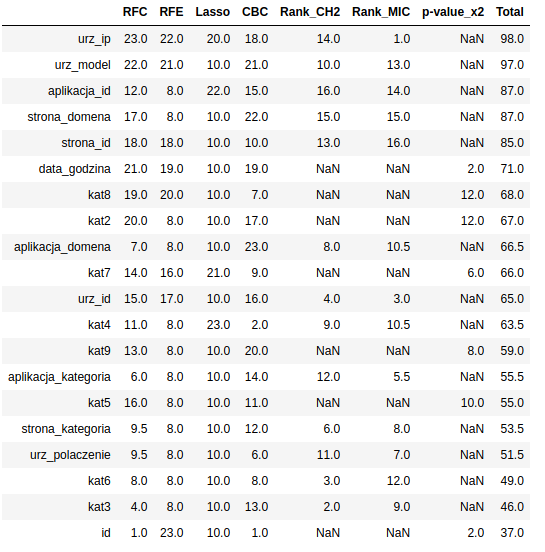

### Wytypowane, najlepsze zmienne do tworzenia zmiennych syntetycznych

'urz_model','strona_domena','kat9','data_godzina','urz_ip','aplikacja_id'

In [18]:
['id', 'klik', 'data_godzina', 'baner_pozycja', 'strona_id',
       'strona_domena', 'strona_kategoria', 'aplikacja_id', 'aplikacja_domena',
       'aplikacja_kategoria', 'urz_id', 'urz_ip', 'urz_model', 'urz_typ',
       'urz_polaczenie', 'kat1', 'kat2', 'kat3', 'kat4', 'kat5', 'kat6',
       'kat7', 'kat8', 'kat9']

['id',
 'klik',
 'data_godzina',
 'baner_pozycja',
 'strona_id',
 'strona_domena',
 'strona_kategoria',
 'aplikacja_id',
 'aplikacja_domena',
 'aplikacja_kategoria',
 'urz_id',
 'urz_ip',
 'urz_model',
 'urz_typ',
 'urz_polaczenie',
 'kat1',
 'kat2',
 'kat3',
 'kat4',
 'kat5',
 'kat6',
 'kat7',
 'kat8',
 'kat9']

### Najlepsze zmienne dla modelu CBC

# zmienne kategoryczne

# Pętla robiąca kolejne kolumny kodu: df.urz_ip
cel jest abym:
1. dostał tyle nowych kolumn ile jest znaków w df.urz_ip poplasterkowanych
2. dostał tyle nowych kolumn ile jest znaków w df.urz_ip zero=litera, jeden=liczba
3. zero-jeden extra kolumna 

# <span style="color:green"> slicer
    1. tnie kod urządzeń na plasterki po jednej kolumnie [kod:1000]
    2. tnie idąc od przodu wg zasady 1plasterek 2plasterki 3plasterki ....[kod:2000]
    3. pokazuje plasterek 0-1 : 0 to wartości literowe, 1 to wartości cyfrowe[kod:3000]
    4. tnie idąc od przodu podwójne plasterki ....[kod:4000]
    5. tnie idąc od przodu potrójne plasterki ...[kod:5000]

In [19]:
def slicer(function):
    function= function.astype(str)
    b = function.str.len().max()   #<- sprawdza maksymalna długość wyrazów
    print('Number of rows of code:',b)
    for a in range(1,b):
    
        df2[1000+a] = function.str.slice(a-1,a)   #<- tnie wyrazy na plasterki
        r = df2[1000+a] 
        print(1000+a)
        df2[2000+a] = r.apply(lambda x: '1' if x in ['1','2','3','4','5','6','7','8','9','0'] else 0)
        df2[3000+a] = function.str.slice(1,a)
        df2[4000+a] = function.str.slice(a-2,a)
        df2[5000+a] = function.str.slice(a-3,a)

In [20]:
# 'urz_model'
slice_fun = 'urz_model'

slicer(df2[slice_fun])
dx1 = df2[[1001,1002,1003,1004,1005,1006,1007]].add_prefix(slice_fun)
dx2 = df2[[2001,2002,2003,2004,2005,2006,2007]].add_prefix(slice_fun)
dx3 = df2[[3001,3002,3003,3004,3005,3006,3007]].add_prefix(slice_fun)
dx4 = df2[[4001,4002,4003,4004,4005,4006,4007]].add_prefix(slice_fun)
dx5 = df2[[5001,5002,5003,5004,5005,5006,5007]].add_prefix(slice_fun)


df2 = pd.merge(df2,dx1, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx2, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx3, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx4, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx5, how='inner', left_index=True, right_index=True)

df2 = df2.drop([1001,1002,1003,1004,1005,1006,1007], axis=1, inplace=True)
df2 = df2.drop([2001,2002,2003,2004,2005,2006,2007], axis=1, inplace=True)
df2 = df2.drop([3001,3002,3003,3004,3005,3006,3007], axis=1, inplace=True)
df2 = df2.drop([4001,4002,4003,4004,4005,4006,4007], axis=1, inplace=True)
df2 = df2.drop([5001,5002,5003,5004,5005,5006,5007], axis=1, inplace=True)


print(df2.shape)
df2.head(5)

Number of rows of code: 8
1001
1002
1003
1004
1005
1006
1007
(1194475, 94)


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,urz_model4005,urz_model4006,urz_model4007,urz_model5001,urz_model5002,urz_model5003,urz_model5004,urz_model5005,urz_model5006,urz_model5007
2912077,93718246916792680,0,17030810,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,07d7df22,...,87,75,5b,,,8a4,a48,487,875,75b
354809,93718246914235412,0,17030118,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,07d7df22,...,15,56,65,,,e98,981,815,156,565
2979730,93718246916860333,0,17030813,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,26,6e,ea,,,ef7,f72,726,26e,6ea
80652,93718246913961255,0,17030104,0,7697ed3e,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,...,7e,e9,91,,,d78,787,87e,7e9,e91
3119766,93718246917000369,0,17030817,0,4bf5bbe2,6b560cc1,28905ebd,ecad2386,7801e8d9,07d7df22,...,43,30,08,,,b64,644,443,430,308


In [21]:
# ,'strona_domena'
slice_fun = 'strona_domena'

slicer(df2[slice_fun])
dx1 = df2[[1001,1002,1003,1004,1005,1006,1007]].add_prefix(slice_fun)
dx2 = df2[[2001,2002,2003,2004,2005,2006,2007]].add_prefix(slice_fun)
dx3 = df2[[3001,3002,3003,3004,3005,3006,3007]].add_prefix(slice_fun)
dx4 = df2[[4001,4002,4003,4004,4005,4006,4007]].add_prefix(slice_fun)
dx5 = df2[[5001,5002,5003,5004,5005,5006,5007]].add_prefix(slice_fun)


df2 = pd.merge(df2,dx1, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx2, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx3, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx4, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx5, how='inner', left_index=True, right_index=True)

df2 = df2.drop([1001,1002,1003,1004,1005,1006,1007], axis=1, inplace=True)
df2 = df2.drop([2001,2002,2003,2004,2005,2006,2007], axis=1, inplace=True)
df2 = df2.drop([3001,3002,3003,3004,3005,3006,3007], axis=1, inplace=True)
df2 = df2.drop([4001,4002,4003,4004,4005,4006,4007], axis=1, inplace=True)
df2 = df2.drop([5001,5002,5003,5004,5005,5006,5007], axis=1, inplace=True)


print(df2.shape)
df2.head(5)

Number of rows of code: 8
1001
1002
1003
1004
1005
1006
1007
(1194475, 129)


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,strona_domena4005,strona_domena4006,strona_domena4007,strona_domena5001,strona_domena5002,strona_domena5003,strona_domena5004,strona_domena5005,strona_domena5006,strona_domena5007
2912077,93718246916792680,0,17030810,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,07d7df22,...,5d,dc,c0,,,e2a,2a5,a5d,5dc,dc0
354809,93718246914235412,0,17030118,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,07d7df22,...,4d,de,ea,,,780,804,04d,4de,dea
2979730,93718246916860333,0,17030813,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,18,8d,dd,,,c4e,4e1,e18,18d,8dd
80652,93718246913961255,0,17030104,0,7697ed3e,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,...,a3,3c,c0,,,c1a,1aa,aa3,a3c,3c0
3119766,93718246917000369,0,17030817,0,4bf5bbe2,6b560cc1,28905ebd,ecad2386,7801e8d9,07d7df22,...,60,0c,cc,,,6b5,b56,560,60c,0cc


In [22]:
# ,'kat9'
slice_fun = 'kat9'

slicer(df2[slice_fun])
dx1 = df2[[1001,1002,1003,1004,1005,1006,1007]].add_prefix(slice_fun)
dx2 = df2[[2001,2002,2003,2004,2005,2006,2007]].add_prefix(slice_fun)
dx3 = df2[[3001,3002,3003,3004,3005,3006,3007]].add_prefix(slice_fun)
dx4 = df2[[4001,4002,4003,4004,4005,4006,4007]].add_prefix(slice_fun)
dx5 = df2[[5001,5002,5003,5004,5005,5006,5007]].add_prefix(slice_fun)


df2 = pd.merge(df2,dx1, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx2, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx3, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx4, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx5, how='inner', left_index=True, right_index=True)

df2 = df2.drop([1001,1002,1003,1004,1005,1006,1007], axis=1, inplace=True)
df2 = df2.drop([2001,2002,2003,2004,2005,2006,2007], axis=1, inplace=True)
df2 = df2.drop([3001,3002,3003,3004,3005,3006,3007], axis=1, inplace=True)
df2 = df2.drop([4001,4002,4003,4004,4005,4006,4007], axis=1, inplace=True)
df2 = df2.drop([5001,5002,5003,5004,5005,5006,5007], axis=1, inplace=True)


print(df2.shape)
df2.head(5)

Number of rows of code: 3
1001
1002
(1194475, 164)


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,kat94005,kat94006,kat94007,kat95001,kat95002,kat95003,kat95004,kat95005,kat95006,kat95007
2912077,93718246916792680,0,17030810,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,07d7df22,...,5d,dc,c0,2,3,e2a,2a5,a5d,5dc,dc0
354809,93718246914235412,0,17030118,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,07d7df22,...,4d,de,ea,2,3,780,804,04d,4de,dea
2979730,93718246916860333,0,17030813,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,18,8d,dd,,,c4e,4e1,e18,18d,8dd
80652,93718246913961255,0,17030104,0,7697ed3e,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,...,a3,3c,c0,,,c1a,1aa,aa3,a3c,3c0
3119766,93718246917000369,0,17030817,0,4bf5bbe2,6b560cc1,28905ebd,ecad2386,7801e8d9,07d7df22,...,60,0c,cc,2,3,6b5,b56,560,60c,0cc


In [23]:
# ,'data_godzina'
slice_fun = 'data_godzina'

slicer(df2[slice_fun])
dx1 = df2[[1001,1002,1003,1004,1005,1006,1007]].add_prefix(slice_fun)
dx2 = df2[[2001,2002,2003,2004,2005,2006,2007]].add_prefix(slice_fun)
dx3 = df2[[3001,3002,3003,3004,3005,3006,3007]].add_prefix(slice_fun)
dx4 = df2[[4001,4002,4003,4004,4005,4006,4007]].add_prefix(slice_fun)
dx5 = df2[[5001,5002,5003,5004,5005,5006,5007]].add_prefix(slice_fun)


df2 = pd.merge(df2,dx1, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx2, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx3, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx4, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx5, how='inner', left_index=True, right_index=True)

df2 = df2.drop([1001,1002,1003,1004,1005,1006,1007], axis=1, inplace=True)
df2 = df2.drop([2001,2002,2003,2004,2005,2006,2007], axis=1, inplace=True)
df2 = df2.drop([3001,3002,3003,3004,3005,3006,3007], axis=1, inplace=True)
df2 = df2.drop([4001,4002,4003,4004,4005,4006,4007], axis=1, inplace=True)
df2 = df2.drop([5001,5002,5003,5004,5005,5006,5007], axis=1, inplace=True)

print(df2.shape)
df2.head(5)

Number of rows of code: 8
1001
1002
1003
1004
1005
1006
1007
(1194475, 199)


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,data_godzina4005,data_godzina4006,data_godzina4007,data_godzina5001,data_godzina5002,data_godzina5003,data_godzina5004,data_godzina5005,data_godzina5006,data_godzina5007
2912077,93718246916792680,0,17030810,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,07d7df22,...,30,08,81,,,170,703,030,308,081
354809,93718246914235412,0,17030118,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,07d7df22,...,30,01,11,,,170,703,030,301,011
2979730,93718246916860333,0,17030813,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,30,08,81,,,170,703,030,308,081
80652,93718246913961255,0,17030104,0,7697ed3e,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,...,30,01,10,,,170,703,030,301,010
3119766,93718246917000369,0,17030817,0,4bf5bbe2,6b560cc1,28905ebd,ecad2386,7801e8d9,07d7df22,...,30,08,81,,,170,703,030,308,081


In [24]:
slice_fun = 'urz_ip'

slicer(df2[slice_fun])
dx1 = df2[[1001,1002,1003,1004,1005,1006,1007]].add_prefix(slice_fun)
dx2 = df2[[2001,2002,2003,2004,2005,2006,2007]].add_prefix(slice_fun)
dx3 = df2[[3001,3002,3003,3004,3005,3006,3007]].add_prefix(slice_fun)
dx4 = df2[[4001,4002,4003,4004,4005,4006,4007]].add_prefix(slice_fun)
dx5 = df2[[5001,5002,5003,5004,5005,5006,5007]].add_prefix(slice_fun)


df2 = pd.merge(df2,dx1, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx2, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx3, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx4, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx5, how='inner', left_index=True, right_index=True)

df2 = df2.drop([1001,1002,1003,1004,1005,1006,1007], axis=1, inplace=True)
df2 = df2.drop([2001,2002,2003,2004,2005,2006,2007], axis=1, inplace=True)
df2 = df2.drop([3001,3002,3003,3004,3005,3006,3007], axis=1, inplace=True)
df2 = df2.drop([4001,4002,4003,4004,4005,4006,4007], axis=1, inplace=True)
df2 = df2.drop([5001,5002,5003,5004,5005,5006,5007], axis=1, inplace=True)


print(df2.shape)
df2.head(5)

Number of rows of code: 8
1001
1002
1003
1004
1005
1006
1007
(1194475, 234)


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,urz_ip4005,urz_ip4006,urz_ip4007,urz_ip5001,urz_ip5002,urz_ip5003,urz_ip5004,urz_ip5005,urz_ip5006,urz_ip5007
2912077,93718246916792680,0,17030810,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,07d7df22,...,49,95,55,,,85d,5d4,d49,495,955
354809,93718246914235412,0,17030118,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,07d7df22,...,12,28,8b,,,4f8,f81,812,128,28b
2979730,93718246916860333,0,17030813,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,46,6b,b1,,,56a,6a4,a46,46b,6b1
80652,93718246913961255,0,17030104,0,7697ed3e,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,...,f6,67,70,,,110,10f,0f6,f67,670
3119766,93718246917000369,0,17030817,0,4bf5bbe2,6b560cc1,28905ebd,ecad2386,7801e8d9,07d7df22,...,4e,e3,3d,,,f65,654,54e,4e3,e3d


In [25]:
slice_fun = 'aplikacja_id'

slicer(df2[slice_fun])
dx1 = df2[[1001,1002,1003,1004,1005,1006,1007]].add_prefix(slice_fun)
dx2 = df2[[2001,2002,2003,2004,2005,2006,2007]].add_prefix(slice_fun)
dx3 = df2[[3001,3002,3003,3004,3005,3006,3007]].add_prefix(slice_fun)
dx4 = df2[[4001,4002,4003,4004,4005,4006,4007]].add_prefix(slice_fun)
dx5 = df2[[5001,5002,5003,5004,5005,5006,5007]].add_prefix(slice_fun)


df2 = pd.merge(df2,dx1, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx2, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx3, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx4, how='inner', left_index=True, right_index=True)
df2 = pd.merge(df2,dx5, how='inner', left_index=True, right_index=True)

df2 = df2.drop([1001,1002,1003,1004,1005,1006,1007], axis=1, inplace=True)
df2 = df2.drop([2001,2002,2003,2004,2005,2006,2007], axis=1, inplace=True)
df2 = df2.drop([3001,3002,3003,3004,3005,3006,3007], axis=1, inplace=True)
df2 = df2.drop([4001,4002,4003,4004,4005,4006,4007], axis=1, inplace=True)
df2 = df2.drop([5001,5002,5003,5004,5005,5006,5007], axis=1, inplace=True)

print(df2.shape)
df2.head(5)

Number of rows of code: 8
1001
1002
1003
1004
1005
1006
1007
(1194475, 269)


,id,klik,data_godzina,baner_pozycja,strona_id,strona_domena,strona_kategoria,aplikacja_id,aplikacja_domena,aplikacja_kategoria,...,aplikacja_id4005,aplikacja_id4006,aplikacja_id4007,aplikacja_id5001,aplikacja_id5002,aplikacja_id5003,aplikacja_id5004,aplikacja_id5005,aplikacja_id5006,aplikacja_id5007
2912077,93718246916792680,0,17030810,0,26fa1946,e2a5dc06,3e814130,ecad2386,7801e8d9,07d7df22,...,d2,23,38,,,eca,cad,ad2,d23,238
354809,93718246914235412,0,17030118,0,2328ee8e,7804dea6,f028772b,ecad2386,7801e8d9,07d7df22,...,d2,23,38,,,eca,cad,ad2,d23,238
2979730,93718246916860333,0,17030813,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,39,98,82,,,e97,973,739,398,982
80652,93718246913961255,0,17030104,0,7697ed3e,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,...,d2,23,38,,,eca,cad,ad2,d23,238
3119766,93718246917000369,0,17030817,0,4bf5bbe2,6b560cc1,28905ebd,ecad2386,7801e8d9,07d7df22,...,d2,23,38,,,eca,cad,ad2,d23,238


In [26]:
df2.columns
df2.shape

(1194475, 269)

## <span style= "color:green"> Zapisuje wynik - dalej idzie do weryfikacji zmiennych (nowych zmiennych)

In [27]:
df2.to_csv('/home/wojciech/Pulpit/4/kliki_uczenie_slicer.csv')